# COMPARING OF THE S&P 500 INDEX FORECASTS  USING ARIMA AND LSTM

# ARIMA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [2]:
data = pd.read_csv('GSPC.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-02,2078.030029,2085.060059,2071.020020,2076.780029,2076.780029,2996540000
1,2015-07-06,2073.949951,2078.610107,2058.399902,2068.760010,2068.760010,3486360000
2,2015-07-07,2069.520020,2083.739990,2044.020020,2081.340088,2081.340088,4458660000
3,2015-07-08,2077.659912,2077.659912,2044.660034,2046.680054,2046.680054,3608780000
4,2015-07-09,2049.729980,2074.280029,2049.729980,2051.310059,2051.310059,3446810000


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1002,2019-06-26,2926.070068,2932.590088,2912.989990,2913.780029,2913.780029,3478130000
1003,2019-06-27,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000
1004,2019-06-28,2932.939941,2943.979980,2929.050049,2941.760010,2941.760010,5420700000
1005,2019-07-01,2971.409912,2977.929932,2952.219971,2964.330078,2964.330078,3513270000
1006,2019-07-02,2964.659912,2973.209961,2955.919922,2973.010010,2973.010010,3206840000


## Getting some statistics (checking if time series is not white noise)

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,2427.140705,2437.756645,2415.418093,2427.394885,2427.394885,3.659192e+09
std,316.608806,317.181474,316.275652,316.569542,316.569542,6.892221e+08
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.349780e+09
25%,2110.575074,2118.074951,2102.280029,2112.724975,2112.724975,3.248800e+09
50%,2434.149902,2441.489990,2427.939941,2433.790039,2433.790039,3.555680e+09
75%,2722.365112,2737.715088,2709.015015,2723.065064,2723.065064,3.916770e+09
max,2971.409912,2977.929932,2955.919922,2973.010010,2973.010010,7.609010e+09


In [6]:
data.shape

(1007, 7)

## Plotting data

In [7]:
data = pd.read_csv('GSPC.csv', index_col='Date')
data_cls = data['Close']
data_cls.head()

Date
2015-07-02    2076.780029
2015-07-06    2068.760010
2015-07-07    2081.340088
2015-07-08    2046.680054
2015-07-09    2051.310059
Name: Close, dtype: float64

In [8]:
data_cls.shape

(1007,)

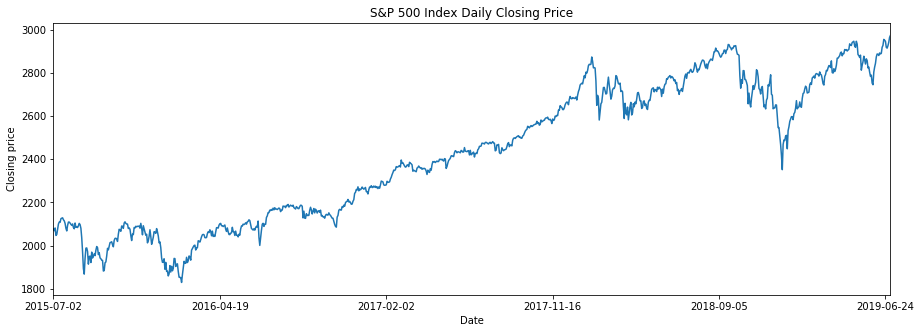

In [9]:
plt.figure(figsize=(15,5))
data_cls.plot()
plt.title('S&P 500 Index Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.show()

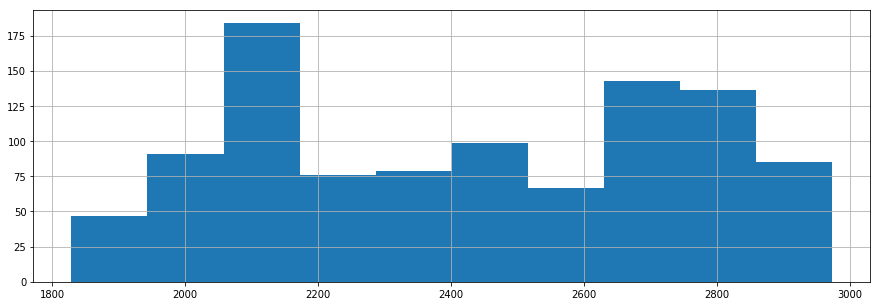

In [10]:
# Plotting histogram
plt.figure(figsize=(15,5));
data_cls.hist()
plt.show()

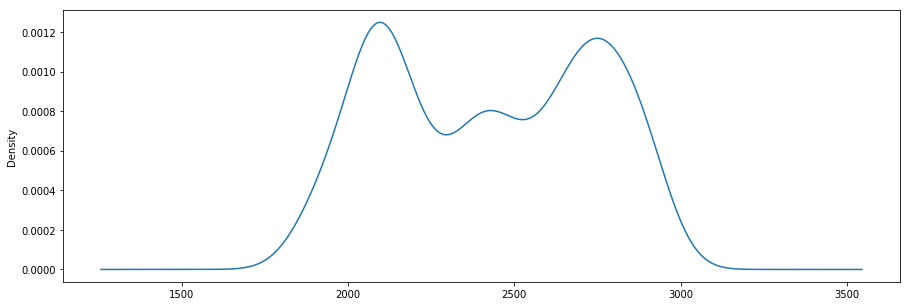

In [11]:
# Density plot
plt.figure(figsize=(15,5));
data_cls.plot(kind='kde')
plt.show()

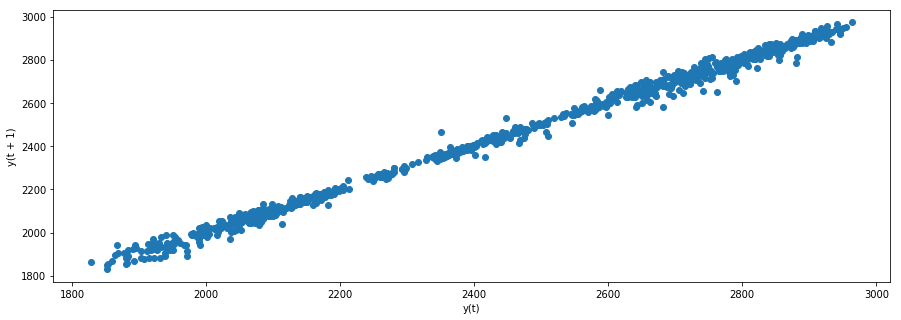

In [12]:
# Checking correlation between lags
from pandas.plotting import lag_plot
plt.figure(figsize=(15,5));
lag_plot(data_cls)
plt.show()

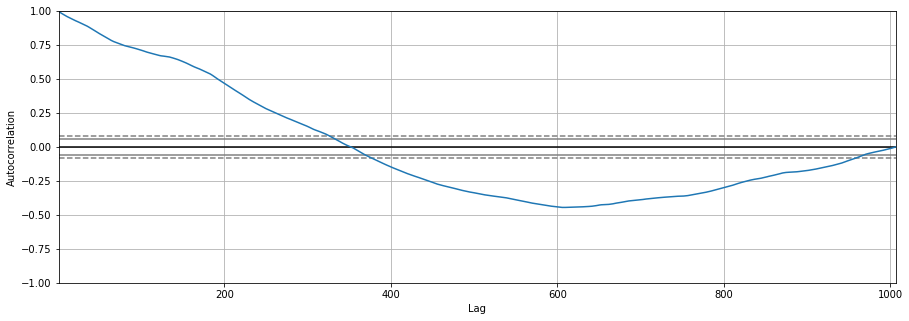

In [13]:
# Autocorrelation plot
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,5));
autocorrelation_plot(data_cls)
plt.show()

## Checking for stationarity

In [16]:
# Perform Dickey-Fuller test
# If test statistic is lower than 5% critical value it means that series is stationary (with 95% confidence)

from statsmodels.tsa.stattools import adfuller

def test_for_stationarity(input_data): 
    result = adfuller(input_data)
    print('Test Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %3f' % (key, value))
    
test_for_stationarity(data_cls)

Test Statistic: -0.612371
p-value: 0.868162
Critical Values:
	1%: -3.436867
	5%: -2.864417
	10%: -2.568302


## Making time series stationary

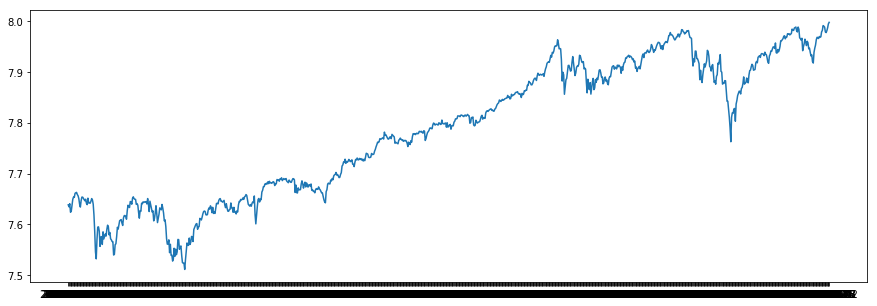

In [17]:
# Eliminating trend by doing logarithm
ts_log = np.log(data_cls)
plt.figure(figsize=(15,5))
plt.plot(ts_log)

In [18]:
# Dickey-Fuller test for log transformed data
test_for_stationarity(ts_log)

Test Statistic: -0.721216
p-value: 0.841177
Critical Values:
	1%: -3.436867
	5%: -2.864417
	10%: -2.568302


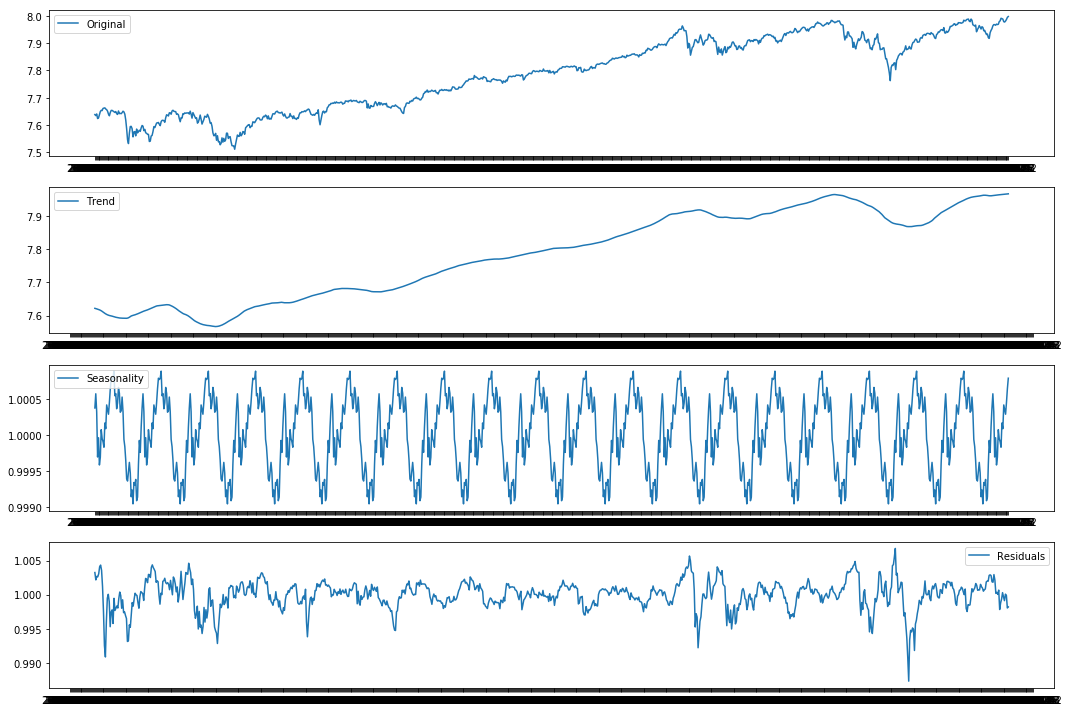

In [19]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts_log, model='multiplicative', freq=52)
plt.figure(figsize=(15,10));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [23]:
ts_log_decompose = result.resid
ts_log_decompose.dropna(inplace=True)
test_for_stationarity(ts_log_decompose)

Test Statistic: -7.440896
p-value: 0.000000
Critical Values:
	1%: -3.437356
	5%: -2.864633
	10%: -2.568417


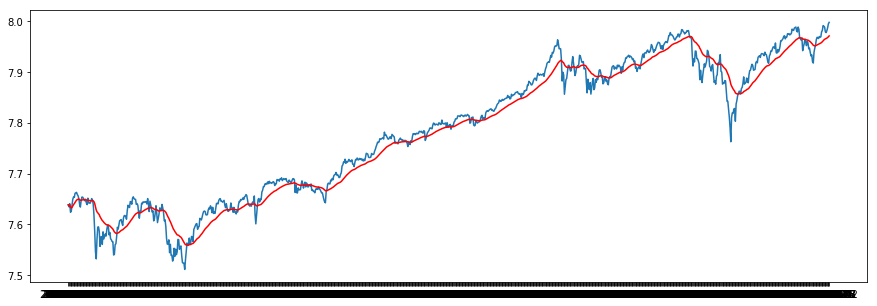

In [24]:
# Smoothing by exponential weighted average
exp_avg = ts_log.ewm(halflife=12).mean()
plt.figure(figsize=(15,5))
plt.plot(ts_log)
plt.plot(exp_avg, color='red')

In [25]:
# Subtracting exponential weighted average
ts_log_exp_avg_diff = ts_log - exp_avg
print(ts_log_exp_avg_diff.head(10))

Date
2015-07-02    0.000000
2015-07-06   -0.001879
2015-07-07    0.002708
2015-07-08   -0.010253
2015-07-09   -0.006205
2015-07-10    0.004897
2015-07-13    0.013219
2015-07-14    0.014983
2015-07-15    0.012275
2015-07-16    0.017667
Name: Close, dtype: float64


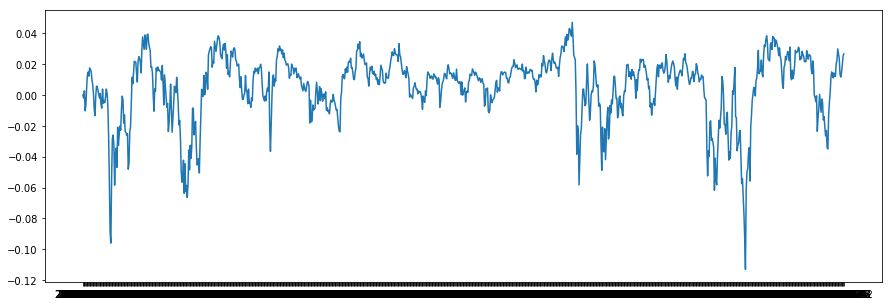

In [26]:
plt.figure(figsize=(15,5))
plt.plot(ts_log_exp_avg_diff)

In [27]:
ts_log_exp_avg_diff.dropna(inplace=True)
ts_log_exp_avg_diff.head(10)

Date
2015-07-02    0.000000
2015-07-06   -0.001879
2015-07-07    0.002708
2015-07-08   -0.010253
2015-07-09   -0.006205
2015-07-10    0.004897
2015-07-13    0.013219
2015-07-14    0.014983
2015-07-15    0.012275
2015-07-16    0.017667
Name: Close, dtype: float64

In [30]:
# Perform Dickey-Fuller test on modified data
test_for_stationarity(ts_log_exp_avg_diff)

Test Statistic: -6.346005
p-value: 0.000000
Critical Values:
	1%: -3.436867
	5%: -2.864417
	10%: -2.568302


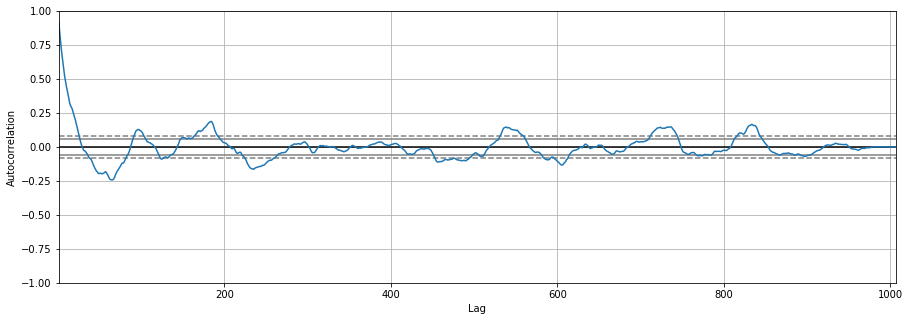

In [31]:
plt.figure(figsize=(15,5))
autocorrelation_plot(ts_log_exp_avg_diff)

## Eliminating trend and seasonality

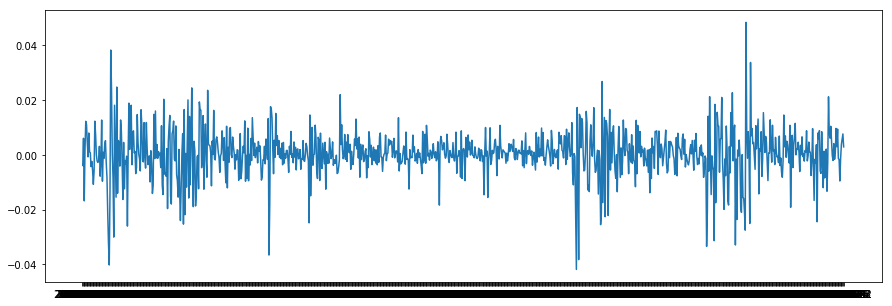

In [32]:
# Differencing
ts_log_differ = ts_log - ts_log.shift()
plt.figure(figsize=(15,5))
plt.plot(ts_log_differ)

In [33]:
ts_log_differ.dropna(inplace=True)

In [36]:
# Perform Dickey-Fuller test on modified data
test_for_stationarity(ts_log_differ)

Test Statistic: -23.486631
p-value: 0.000000
Critical Values:
	1%: -3.436880
	5%: -2.864423
	10%: -2.568305


## Performing ARIMA 

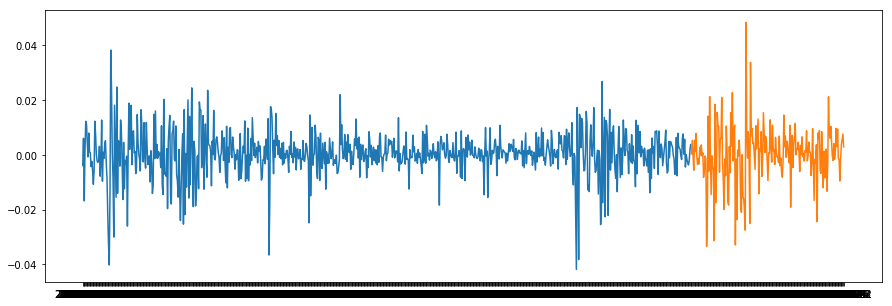

In [37]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Dividing data into train and test
train_size = int(len(ts_log_differ)*0.8)
train, test = ts_log_differ[0:train_size], ts_log_differ[train_size:len(ts_log_differ)]

plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(test)

In [38]:
# Walk-forward validation and ARIMA performing
historical_data = [x for x in train]
predictions = list()

for t in range(len(test)):
    # fit model
    model = ARIMA(historical_data, order=(4,1,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and observation
    predictions.append(yhat)
    historical_data.append(test[t])
    

In [39]:
# Evaluate forecast
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse) 

Test RMSE: 0.012


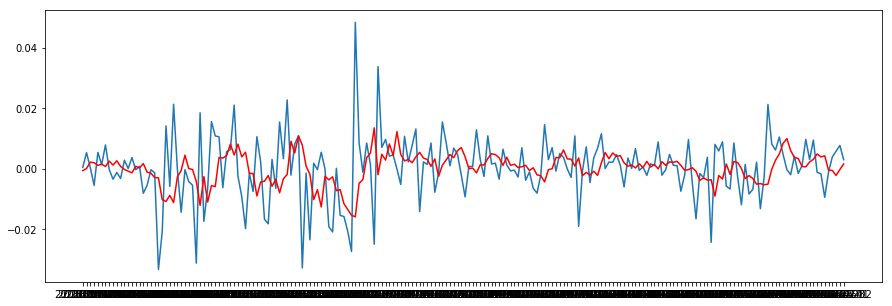

In [40]:
# Plot forecasts against actual outcomes
plt.figure(figsize=(15,5))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [41]:
predictions[0:10]

[array([-0.00068214]),
 array([-2.60508692e-06]),
 array([0.00209359]),
 array([0.00193308]),
 array([0.00103391]),
 array([0.00144455]),
 array([0.00067208]),
 array([0.00244877]),
 array([0.0011386]),
 array([0.00256598])]

<Figure size 1080x360 with 0 Axes>

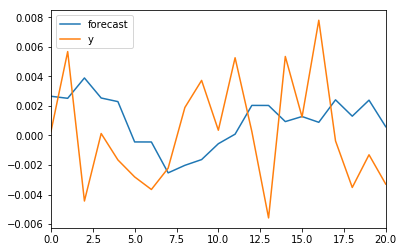

In [52]:
# Plot prediction
plt.figure(figsize=(15,5))
model_fit.plot_predict(len(train)-10, len(train)+10)
plt.show()


# Performing ARIMA using Box-Cox transform

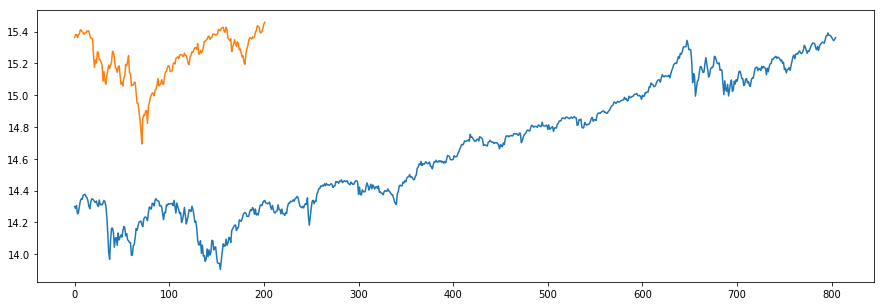

In [53]:
from scipy.stats import boxcox

# Dividing data into train and test
box_cox_transform_data = boxcox(data_cls, lmbda=0.15)

train_size = int(len(box_cox_transform_data)*0.8)
train, test = box_cox_transform_data[0:train_size], box_cox_transform_data[train_size:len(box_cox_transform_data)]

plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(test)

In [54]:
# Walk-forward validation and ARIMA performing
historical_data = [x for x in train]
predictions = list()

for t in range(len(test)):
    # fit model
    model = ARIMA(historical_data, order=(4,1,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    historical_data.append(test[t])

In [55]:
# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse) 

Test RMSE: 0.035


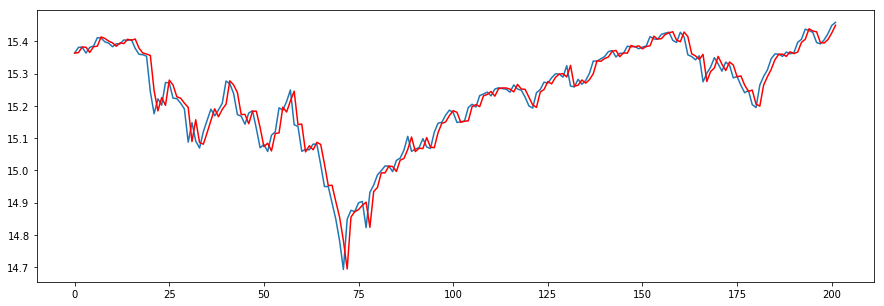

In [56]:
# Plot forecasts against actual outcomes
plt.figure(figsize=(15,5))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Performing ARIMA on decomposed data (residuals)

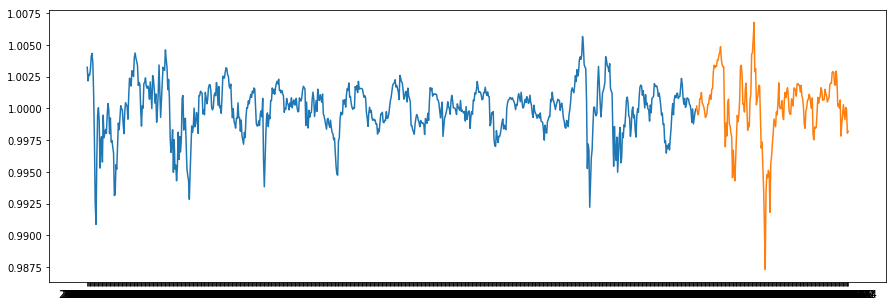

In [57]:
# Dividing data into train and test
train_size = int(len(ts_log_decompose)*0.8)
train, test = ts_log_decompose[0:train_size], ts_log_decompose[train_size:len(ts_log_decompose)]

plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(test)

In [58]:
# Walk-forward validation and ARIMA performing
historical_data = [x for x in train]
predictions = list()

for t in range(len(test)):
    # fit model
    model = ARIMA(historical_data, order=(4,1,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    historical_data.append(test[t])

In [59]:
# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse) 

Test RMSE: 0.001


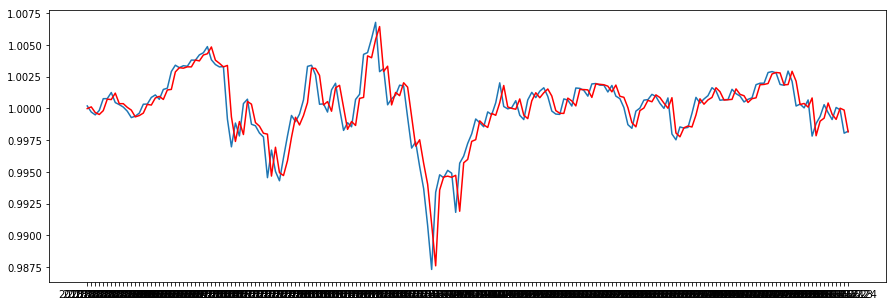

In [60]:
# Plot forecasts against actual outcomes
plt.figure(figsize=(15,5))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Performing ARIMA on clear non-stationary data

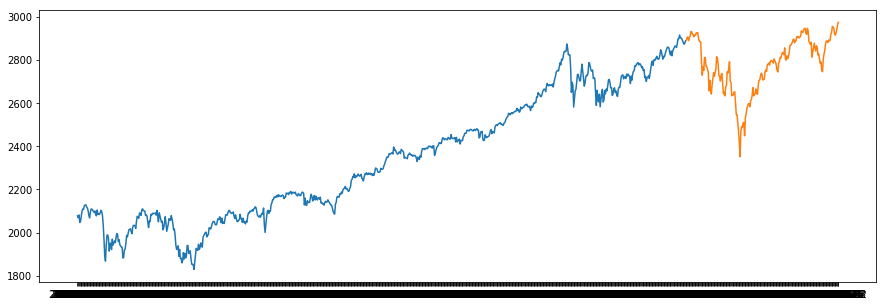

In [61]:
# Dividing data into train and test
train_size = int(len(data_cls)*0.8)
train, test = data_cls[0:train_size], data_cls[train_size:len(data_cls)]

plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(test)

In [62]:
# Walk-forward validation and ARIMA performing
historical_data = [x for x in train]
predictions = list()

for t in range(len(test)):
    # fit model
    model = ARIMA(historical_data, order=(4,1,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    historical_data.append(test[t])

In [63]:
# Evaluate forecast
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)     

RMSE: 28.465


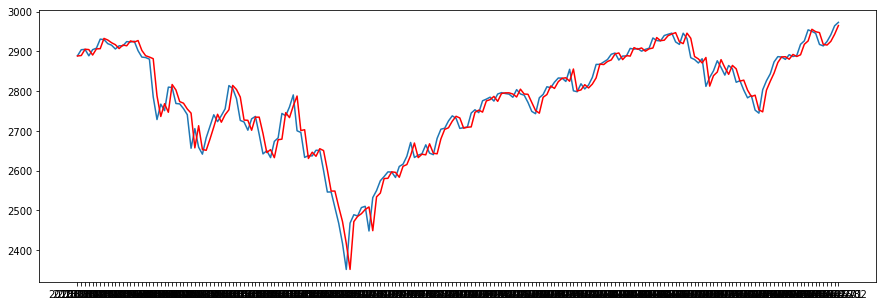

In [64]:
# Plot forecasts against actual outcomes
plt.figure(figsize=(15,5))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [65]:
# Performing ARIMA with different p,d,q params
def arima_test(p,d,q):
    historical_data = [x for x in train]
    predictions = list()

    for t in range(len(test)):
        # fit model
        model = ARIMA(historical_data, order=(p,d,q))
        model_fit = model.fit()
        # one step forecast
        yhat = model_fit.forecast()[0]
        # store forecast and ob
        predictions.append(yhat)
        historical_data.append(test[t])
    
    rmse = sqrt(mean_squared_error(test, predictions))
    print('RMSE: %.3f' % rmse)
    print(model_fit.summary())

In [66]:
arima_test(8,1,0)

C:\Users\FHP Transfer\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RMSE: 28.599
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1005
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -4462.918
Method:                       css-mle   S.D. of innovations             20.527
Date:                Wed, 31 Jul 2019   AIC                           8945.837
Time:                        21:50:32   BIC                           8994.964
Sample:                             1   HQIC                          8964.504
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8782      0.571      1.538      0.124      -0.241       1.997
ar.L1.D.y     -0.0011      0.031     -0.034      0.973      -0.063       0.061
ar.L2.D.y     -0.0449      0.031     -1

In [67]:
arima_test(4,2,0)

RMSE: 31.372
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 1004
Model:                 ARIMA(4, 2, 0)   Log Likelihood               -4563.784
Method:                       css-mle   S.D. of innovations             22.788
Date:                Wed, 31 Jul 2019   AIC                           9139.568
Time:                        21:51:30   BIC                           9169.039
Sample:                             2   HQIC                          9150.767
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0167      0.244      0.069      0.945      -0.461       0.495
ar.L1.D2.y    -0.7854      0.031    -25.323      0.000      -0.846      -0.725
ar.L2.D2.y    -0.6205      0.038    -16

In [68]:
arima_test(2,1,0)

RMSE: 28.392
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1005
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4467.845
Method:                       css-mle   S.D. of innovations             20.629
Date:                Wed, 31 Jul 2019   AIC                           8943.690
Time:                        21:51:42   BIC                           8963.341
Sample:                             1   HQIC                          8951.157
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8814      0.620      1.421      0.155      -0.334       2.097
ar.L1.D.y     -0.0048      0.032     -0.153      0.879      -0.067       0.057
ar.L2.D.y     -0.0448      0.032     -1

# LSTM

In [23]:
import numpy as np
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [24]:
# Loading data
data = pd.read_csv('GSPC.csv', usecols=[4])
data.head()

,Close
0,2076.780029
1,2068.760010
2,2081.340088
3,2046.680054
4,2051.310059


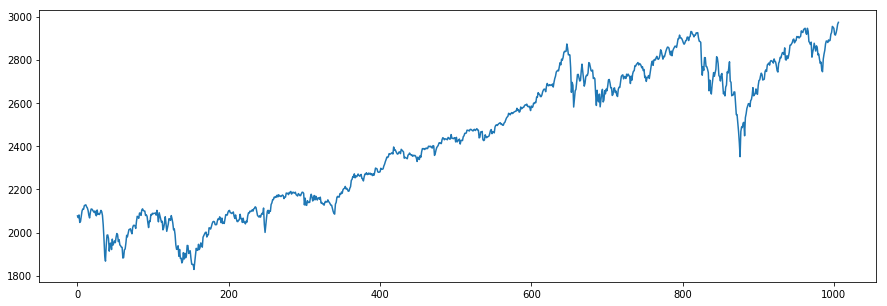

In [25]:
# Plotting data
plt.figure(figsize=(15,5))
plt.plot(data)
plt.show()

In [26]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

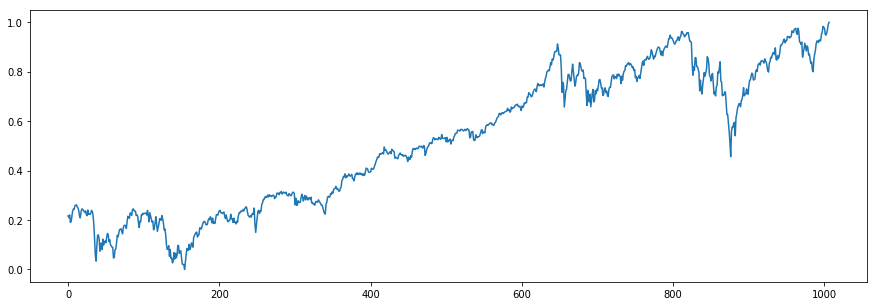

In [27]:
# Plotting normalized data
plt.figure(figsize=(15,5))
plt.plot(dataset)
plt.show()

In [28]:
# Split data into train and test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

674 333


In [29]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [30]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [31]:
# Reshape input 
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [32]:
trainX[:10]

array([[[0.21653428, 0.20952335, 0.22052059]],

       [[0.20952335, 0.22052059, 0.19022151]],

       [[0.22052059, 0.19022151, 0.19426896]],

       [[0.19022151, 0.19426896, 0.21639449]],

       [[0.19426896, 0.21639449, 0.23648311]],

       [[0.21639449, 0.23648311, 0.24465656]],

       [[0.23648311, 0.24465656, 0.24330154]],

       [[0.24465656, 0.24330154, 0.25806655]],

       [[0.24330154, 0.25806655, 0.26012074]],

       [[0.25806655, 0.26012074, 0.26155452]]])

In [33]:
testX[:10]

array([[[0.78476834, 0.79540704, 0.83701806]],

       [[0.79540704, 0.83701806, 0.83391468]],

       [[0.83701806, 0.83391468, 0.818433  ]],

       [[0.83391468, 0.818433  , 0.80459467]],

       [[0.818433  , 0.80459467, 0.80271527]],

       [[0.80459467, 0.80271527, 0.80680637]],

       [[0.80271527, 0.80680637, 0.77263462]],

       [[0.80680637, 0.77263462, 0.77614884]],

       [[0.77263462, 0.77614884, 0.77176919]],

       [[0.77614884, 0.77176919, 0.71211521]]])

In [34]:
trainY[:10]

array([0.19022151, 0.19426896, 0.21639449, 0.23648311, 0.24465656,
       0.24330154, 0.25806655, 0.26012074, 0.26155452, 0.25362565])

In [35]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2,validation_split=0.1)

Train on 603 samples, validate on 67 samples
Epoch 1/100
 - 4s - loss: 0.0356 - val_loss: 0.0392
Epoch 2/100
 - 1s - loss: 0.0042 - val_loss: 0.0012
Epoch 3/100
 - 1s - loss: 6.4297e-04 - val_loss: 0.0023
Epoch 4/100
 - 1s - loss: 4.1824e-04 - val_loss: 0.0032
Epoch 5/100
 - 1s - loss: 3.9469e-04 - val_loss: 0.0027
Epoch 6/100
 - 1s - loss: 3.8055e-04 - val_loss: 0.0020
Epoch 7/100
 - 1s - loss: 3.6674e-04 - val_loss: 0.0017
Epoch 8/100
 - 1s - loss: 3.4243e-04 - val_loss: 0.0013
Epoch 9/100
 - 1s - loss: 3.2188e-04 - val_loss: 0.0016
Epoch 10/100
 - 1s - loss: 3.1457e-04 - val_loss: 9.8543e-04
Epoch 11/100
 - 1s - loss: 2.9704e-04 - val_loss: 7.7229e-04
Epoch 12/100
 - 1s - loss: 2.8381e-04 - val_loss: 8.9641e-04
Epoch 13/100
 - 1s - loss: 2.7189e-04 - val_loss: 7.3665e-04
Epoch 14/100
 - 1s - loss: 2.6284e-04 - val_loss: 0.0014
Epoch 15/100
 - 1s - loss: 2.7419e-04 - val_loss: 7.9328e-04
Epoch 16/100
 - 1s - loss: 2.6821e-04 - val_loss: 7.5568e-04
Epoch 17/100
 - 1s - loss: 2.6730e-0

In [36]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Evaluate forecast
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.43 RMSE
Test Score: 49.69 RMSE


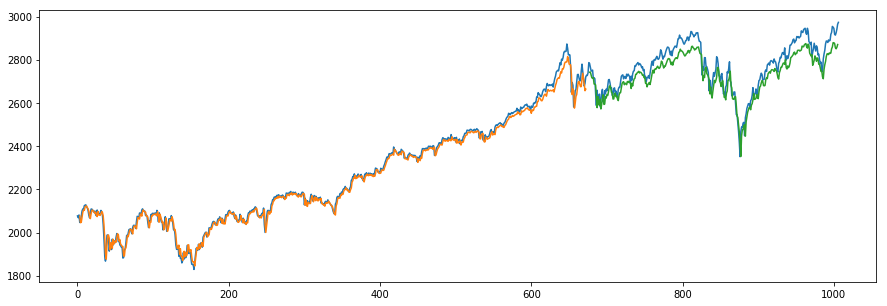

In [37]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# Plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()